In [189]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
from plotnine import *
import plotly.graph_objects as go
from pandas.api.types import CategoricalDtype
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import norm
from scipy.stats import gaussian_kde


In [190]:
df_st_cost_production_major_5_2008_09 = pd.read_csv('crop\state\Cost Estimates of some Principal Crops in Five Major Producing States During 2008-09.csv')
df_st_cost_production_major_5_2008_14 = pd.read_csv('crop\state\State UT-wise Cost Estimate of Some Principal Crops in Five Major Producing States from 2008-09 to 2013-14.csv')

In [191]:
df_cost = df_st_cost_production_major_5_2008_09.copy()
df_cost.drop(columns = ['Crop', 'State'], inplace = True)
df_cost.rename(columns = {'Cost of Cultivation (`/Hectare) A2+FL': 'Cost A2_FL','Cost of Cultivation (`/Hectare) C2':'Cultivation_Cost C2', 
                            'Cost of Production (`/Quintal) C2': 'Production_cost', 'Yield (Quintal/ Hectare) ': 'Yield'  }, inplace = True)
df_cost.columns


Index(['Cost A2_FL', 'Cultivation_Cost C2', 'Production_cost', 'Yield'], dtype='object')

In [192]:
def remove_outliers(data):
    '''This function removes outliers from a given column.'''
    cleaned_data = pd.DataFrame()
    
    for col in data.columns:
        
        # Calculating IQR for the column
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Defining bounds for outlier removal
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Removing outliers based on the bounds
        cleaned_data[col] = data[col][(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    return cleaned_data

In [193]:
df_cost = remove_outliers(df_cost)

In [194]:
df_st_cost_production_major_5_2008_09.rename(columns = {'Cost of Cultivation (`/Hectare) A2+FL': 'Cost A2_FL','Cost of Cultivation (`/Hectare) C2':'Cultivation_Cost C2', 
                            'Cost of Production (`/Quintal) C2': 'Production_cost', 'Yield (Quintal/ Hectare) ': 'Yield'  }, inplace = True)

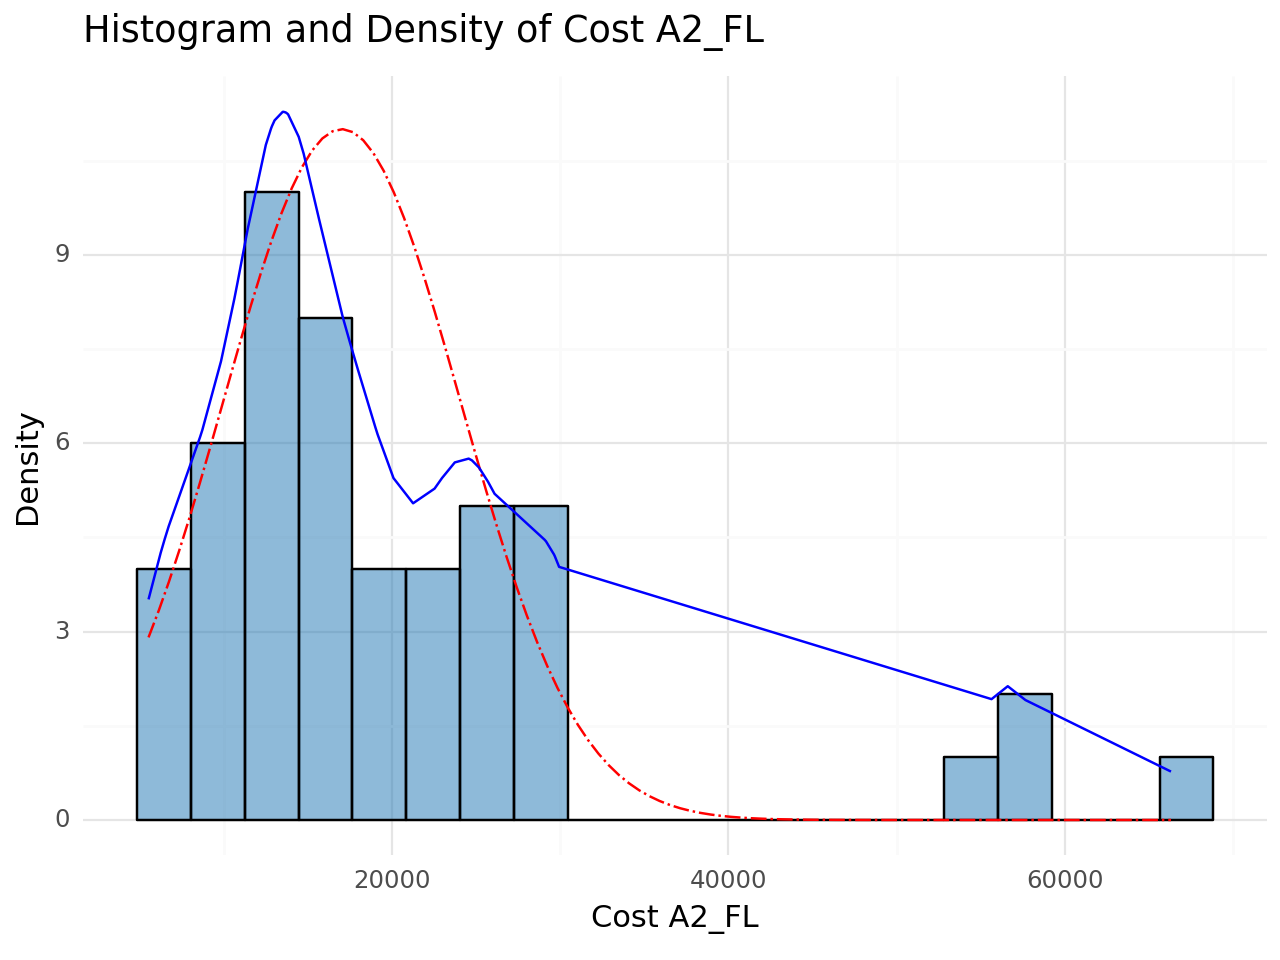

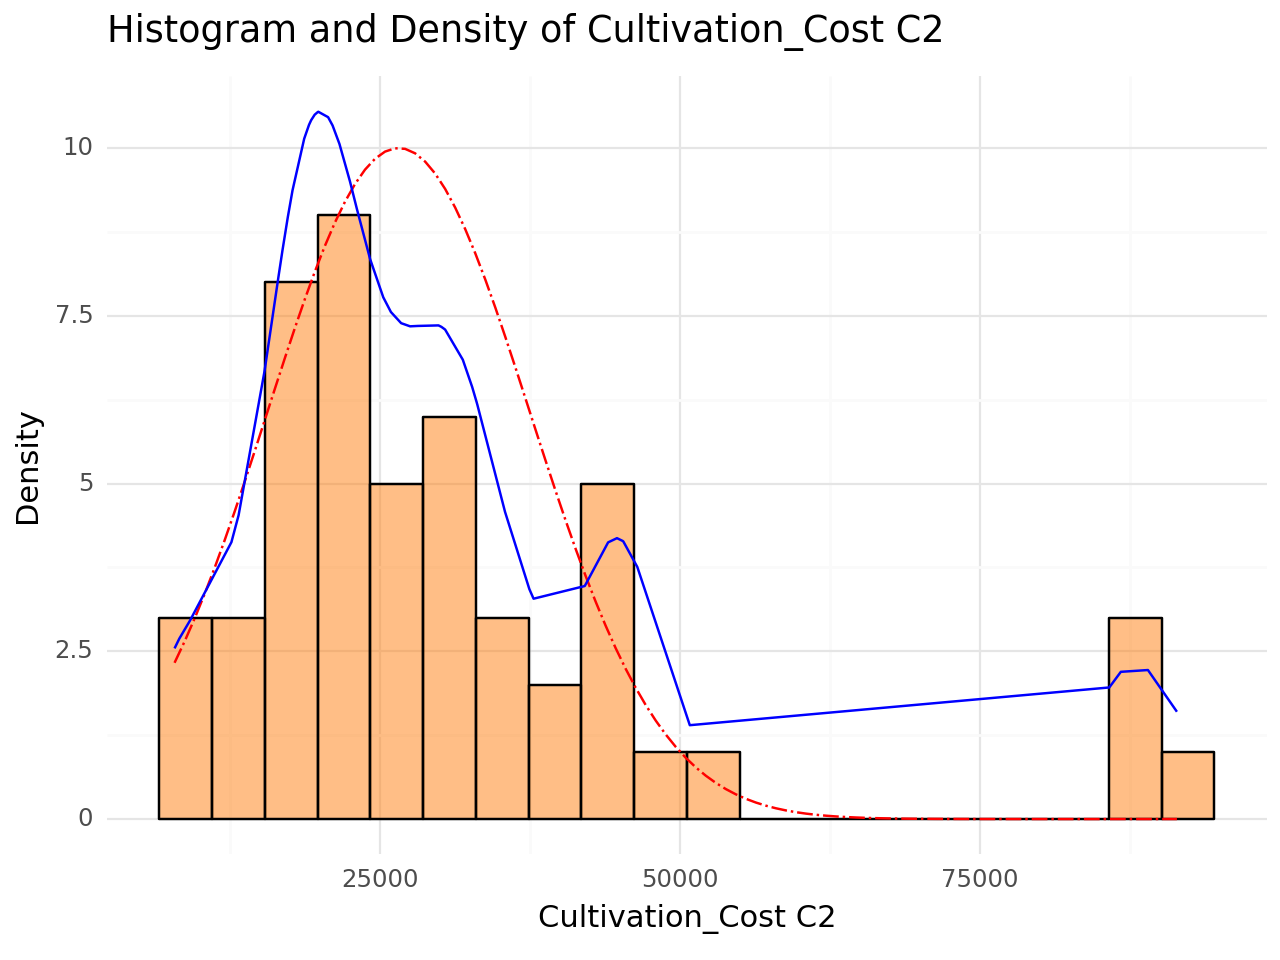

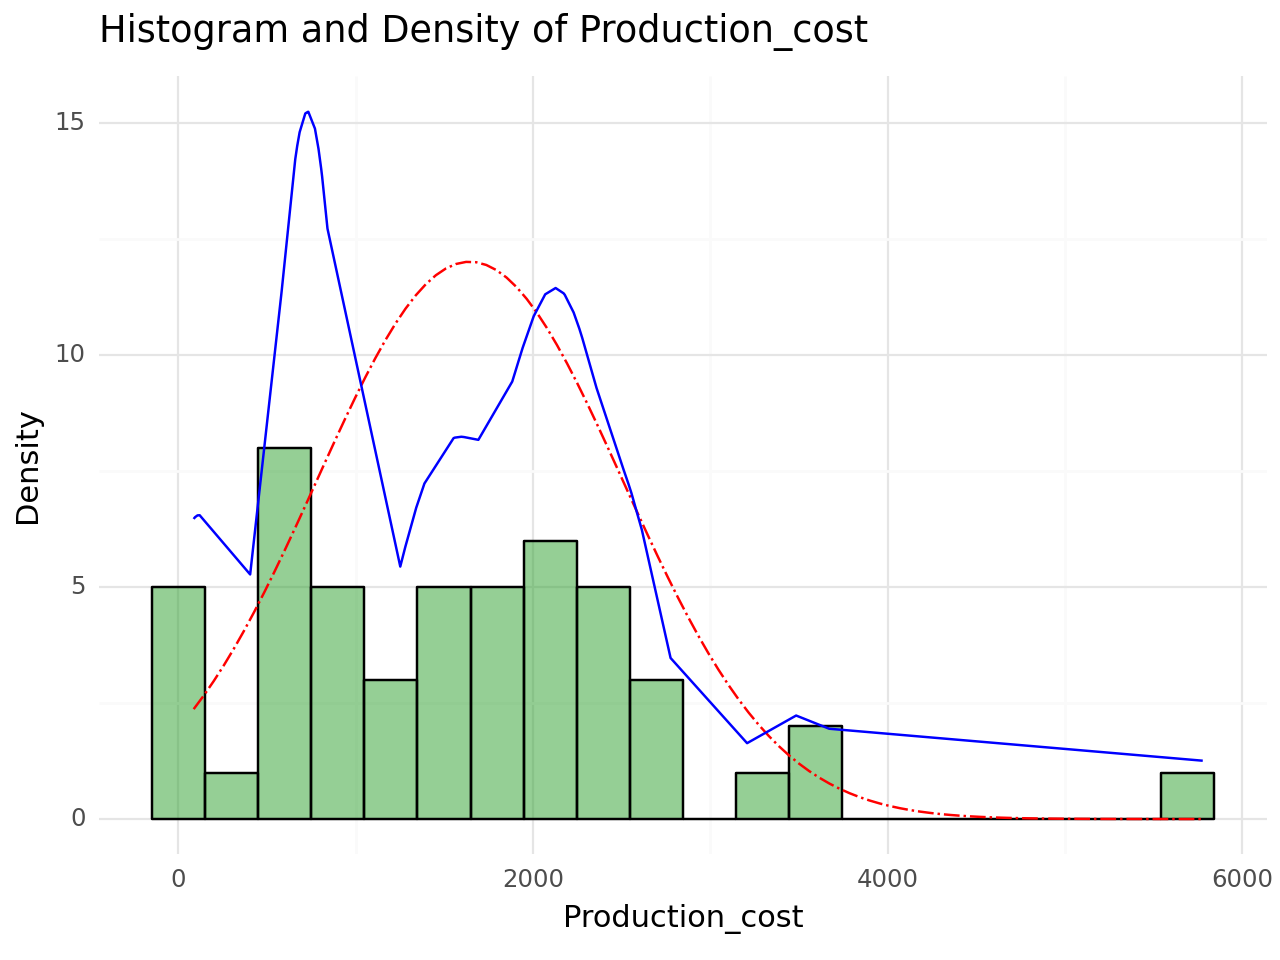

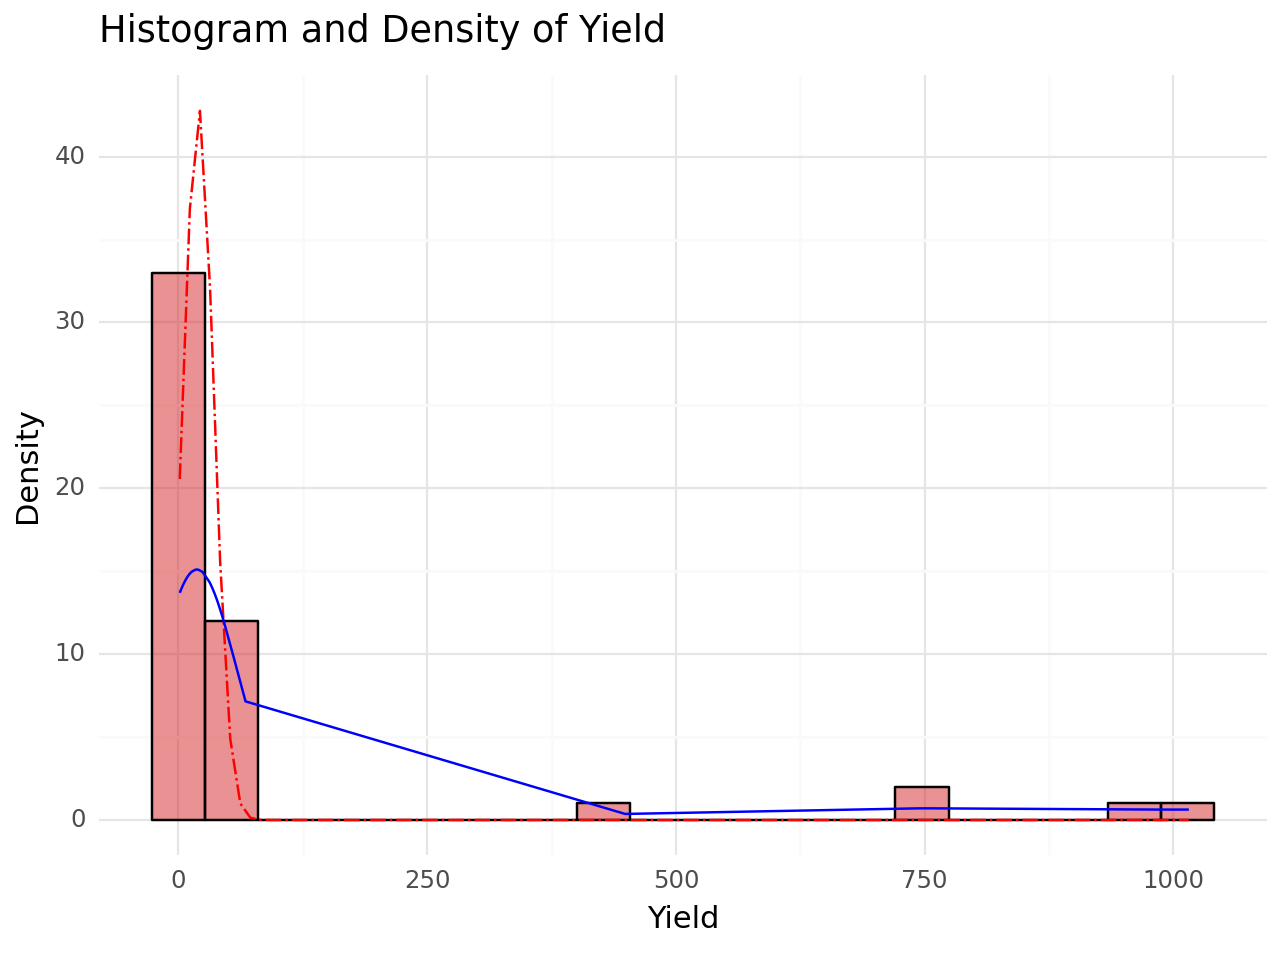

In [195]:

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for i, column in enumerate(df_cost.columns):
    mean_val = df_cost[column].mean()
    std_val = df_cost[column].std()
    
    # Calculating maximum histogram values
    hist_values, _ = np.histogram(df_st_cost_production_major_5_2008_09[column], bins=20)
    max_hist = hist_values.max()
    
    # Calculating density values
    density_values = norm.pdf(df_st_cost_production_major_5_2008_09[column], loc=mean_val, scale=std_val)
    max_density = density_values.max()
    min_density = density_values.min()
    
    # Scaling the density curve to match the histogram
    density_scaled = density_values * (max_hist / max_density)
    
    # Calculating KDE
    kde = gaussian_kde(df_st_cost_production_major_5_2008_09[column], bw_method = 0.15)
    kde_values = kde.pdf(df_st_cost_production_major_5_2008_09[column]) * (max_hist / (max_density-min_density))
    
    plot = (ggplot(df_st_cost_production_major_5_2008_09, aes(x=column)) +
            geom_histogram(fill=colors[i % len(colors)], bins=20, color='black', alpha=0.5) +
            stat_function(
                fun=lambda x: norm.pdf(x, loc=mean_val, scale=std_val) * (max_hist / max_density),
                color='red',
                linetype='dashdot'
            ) +
            geom_line(aes(y=kde_values), color='blue')+
            labs(title=f'Histogram and Density of {column}', x=column, y='Density') +
            theme_minimal() 
    )

    print(plot)


Here I have created a histogram and smoothened with a density curve. I have also for comaprison shown a smooth gaussian curve for data of each column. 

Its benefits are: 
1) I can see the shape of the distribution easily and compare it with the gaussian curve.
2) It provide a visual representation of the distribution of data by binning it into intervals and showing the frequency of observations within each bin.
3) It helps me to understand the spread and shape of the cost data, allowing me to observe any skewness or outliers in the distribution

C:\Users\Shubhi Agarwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Shubhi Agarwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Shubhi Agarwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Shubhi Agarwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : R

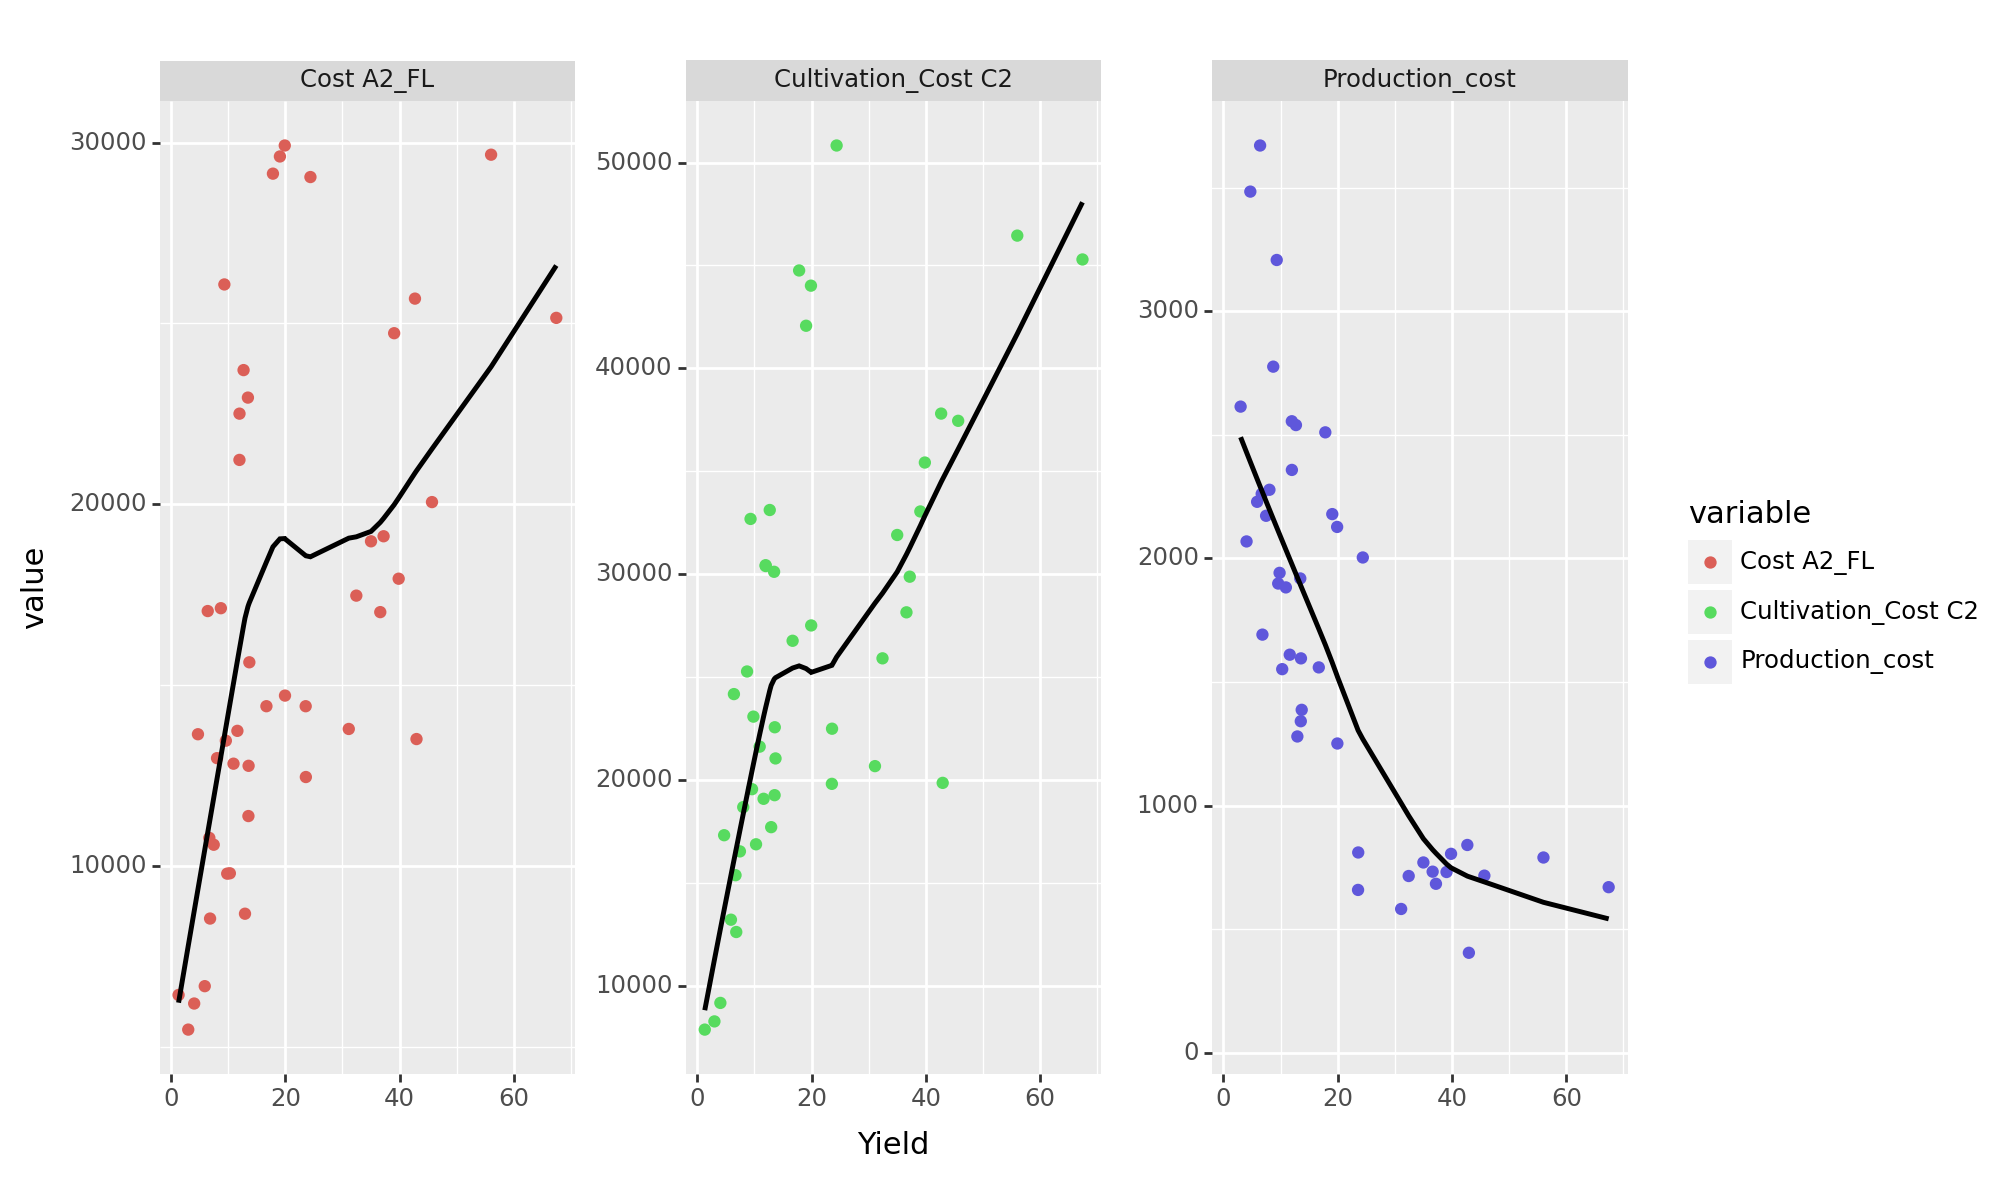

<Figure Size: (1000 x 600)>

In [196]:
cost_data_long = pd.melt(df_cost, id_vars='Yield', value_vars=['Cost A2_FL', 'Cultivation_Cost C2', 'Production_cost'])
h = (ggplot(cost_data_long,aes(x="Yield",y="value"))+
    geom_point(aes(color="variable"))+geom_smooth()+
    facet_wrap("~variable",scales="free_y") + 
    theme(figure_size=(10, 6)))
h

Here I have only considered data which lies in the interquartile range (after removing outliers)
I have created a scatter plot of comparing yield values with different types of crop production values. Then I have smoothened their shapes. 

By focusing on data within the interquartile range and removing outliers, I ensure that my analysis is less influenced by extreme values that might skew the results

help to highlight underlying trends and patterns in the data making it easier to identify relationships and draw conclusions from the plot.